#### Classical Linear Regression Model  (Johnson&Wichern)

Metodología estadística para predecir el valor de una o más respuestas a partir de una colección de predictores.

$Y = \beta_0 + \beta_1 z_1 + ... + \beta_r z_r + \epsilon$

La variable Y (response) = media (dependiendo de $z_1$, $z_2$, ... $z_r$) + error.

Si tenemos n observaciones independientes de Y y sus respectivos valores, el modelo completo es:

\begin{align}
Y_1 =  \beta_0 + \beta_1 z_11 + \beta_2 z_12 + ... + \beta_r z_1r + \epsilon_1 \\
Y_2 =  \beta_0 + \beta_1 z_21 + \beta_2 z_22 + ... + \beta_r z_2r + \epsilon_2 \\
... \\
Y_n =  \beta_0 + \beta_1 z_n1 + \beta_2 z_n2 + ... + \beta_r z_nr + \epsilon_n \\
\end{align}

O, de forma matricial:

$$Y = Z \beta + \epsilon$$

Se asume que el error cumple con las siguientes propiedades:

 - $E(\epsilon_j) = 0$
 - $Var(\epsilon_j) = \sigma^2$
 - $Cov(\epsilon_j,\epsilon_k) = 0,j \neq k$

O, de forma matricial:

 - $E(\epsilon) = 0$
 - $Cov(\epsilon) = E(\epsilon\epsilon') = \sigma I$
 
Estimando $\beta$ usando mínimos cuadrados:


$$\hat\beta = (ZZ')^{-1} Z' y $$

#### Example #1

In [ ]:
import numpy as np
X = np.array([0,1,2,3,4])
Y = np.array([1,4,3,8,9])

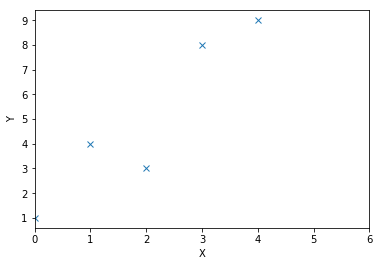

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, Y, 'x')
plt.xlim(0,6)
plt.xlabel('X')
plt.ylabel('Y')

In [24]:
# estimador_beta = (Z*Z')^-1 * Z' * Y
Z = np.c_[np.ones(X.shape[0]), X]
Z

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.]])

In [27]:
Z2 = Z.T.dot(Z)
Z2

array([[  5.,  10.],
       [ 10.,  30.]])

In [28]:
Z2_inv = np.linalg.inv(Z2)
Z2_inv

array([[ 0.6, -0.2],
       [-0.2,  0.1]])

In [30]:
beta_hat = np.linalg.inv(Z.T.dot(Z)).dot(Z.T).dot(Y)
beta_hat

array([ 1.,  2.])

Modelo:
$$
\hat Y = Z \hat\beta \\
\hat y = 1 + 2 * z
$$

In [35]:
Y_hat = Z.dot(beta_hat)
Y_hat

array([ 1.,  3.,  5.,  7.,  9.])

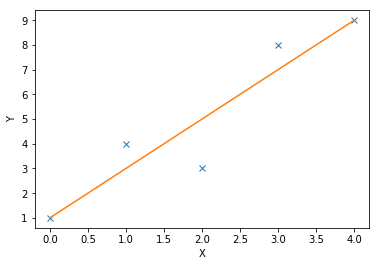

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, Y, 'x')
plt.plot(X, Y_hat)
plt.xlabel('X')
plt.ylabel('Y')

In [50]:
epsilon_hat = Y - Y_hat
epsilon_hat

array([ -8.88178420e-16,   1.00000000e+00,  -2.00000000e+00,
         1.00000000e+00,  -3.55271368e-15])

In [51]:
# residual sum of squares
epsilon_hat.T.dot(epsilon_hat)

5.9999999999999991

$$y'y = \hat y' \hat y + \hat\epsilon' \hat\epsilon$$

In [55]:
print("Y'Y =", Y.T.dot(Y))
print("Y_'Y_ + e_'e_ =", Y_hat.T.dot(Y_hat) + epsilon_hat.T.dot(epsilon_hat))

Y'Y = 171
Y_'Y_ + e_'e_ = 171.0


Coefficient of determination
$$R^2 = 1 - \frac{\sum_{j=1}^n \hat\epsilon_j^2}{\sum_{j=1}^n (y_j - \bar y)} = \frac{\sum_{j=1}^n (\hat y_j - \bar y)}{\sum_{j=1}^n (y_j - \bar y)}$$

Residuals $\hat\epsilon_j$ can be plotted against the predicted values $\hat y_j$. It should be like (d) showing equal variances and no dependences on $\hat y$

<img src="residuals_against_predicted_y_small.png"/>

In [ ]:
#### Example #2

In [63]:
X = np.array([
[15.31,57.3],
[15.2,63.8],
[16.25,65.4,],
[14.33,57.0],
[14.57,63.8],
[17.33,63.2],
[14.48,60.2],
[14.91,57.7],
[15.25,56.4],
[13.89,55.6],
[15.18,62.6],
[14.44,63.4],
[14.87,60.2],
[18.63,67.2],
[15.2,57.1],
[25.76,89.6],
[19.05,68.6],
[15.37,60.1],
[18.06,66.3],
[16.35,65.8]])
Y = np.array([
    74.8,
    74,
    72.9,
    70.0,
    74.9,
    76,
    72,
    73.5,
    74.5,
    73.5,
    71.5,
    71,
    78.9,
    86.5,
    68,
    102,
    84,
    69,
    88,
    76])

In [66]:
Z = np.c_[np.ones(X.shape[0]), X]
beta_hat = np.linalg.inv(Z.T.dot(Z)).dot(Z.T).dot(Y)
beta_hat

array([ 30.96656634,   2.63439962,   0.04518386])

In [67]:
Y_hat = Z.dot(beta_hat)
Y_hat

array([  73.88825979,   73.89217092,   76.7305847 ,   71.292993  ,
         72.23249916,   79.47633181,   71.83274129,   72.85257348,
         73.68953034,   70.07059976,   73.7852623 ,   71.87195366,
         72.86015715,   83.08178676,   73.58943906,  102.87717455,
         84.25149201,   74.17283857,   81.5395135 ,   77.01209821])

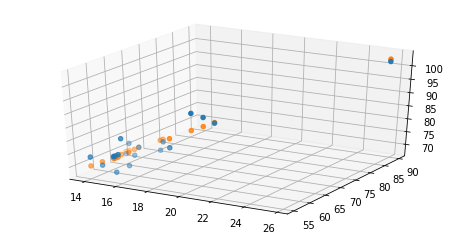

In [93]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.scatter(X[:, 0], X[:, 1], Y_hat)

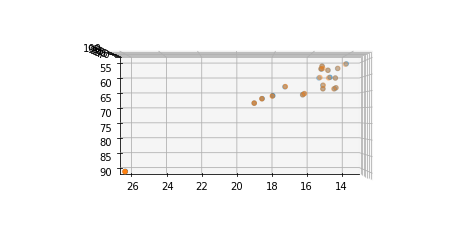

In [96]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.scatter(X[:, 0], X[:, 1], Y_hat)
ax.view_init(elev=90., azim=90.)